Topic Modelling

https://www.kaggle.com/datasets/kabirnagpal/flipkart-customer-review-and-rating

In [7]:
!pip install nltk

In [8]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords (you only need to run this once)
nltk.download('stopwords')

# Assuming you have loaded your Flipkart dataset into a DataFrame named 'flipkart_data'
# If not, replace 'your_flipkart_dataset.csv' with your actual dataset file
flipkart_data = pd.read_csv('data.csv')

# Fill missing values in 'review' column with empty strings
flipkart_data['review'].fillna('', inplace=True)

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters, digits, and extra whitespaces
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Vectorize the preprocessed text data
vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(flipkart_data['review'].apply(preprocess_text))

# Fit LDA model
lda_model = LatentDirichletAllocation(n_components=5, random_state=42)
lda_model.fit(X)

# Display the top words for each topic
def display_topics(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        sorted_indices = topic.argsort()[::-1][:n_top_words]
        for i in sorted_indices:
            word_prob = feature_names[i]
            prob = topic[i] / topic.sum()  # Normalizing probability
            print(f"{prob:.4f} * {word_prob}", end=', ')
        print()

# Display the top words and their probabilities for each topic
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(lda_model, feature_names, n_top_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Topic 1:
0.0422 * good, 0.0257 * sound, 0.0216 * quality, 0.0195 * use, 0.0177 * ear, 0.0174 * ears, 0.0140 * tight, 0.0122 * bass, 0.0118 * long, 0.0113 * using, 
Topic 2:
0.0936 * goodread, 0.0354 * bluetooth, 0.0293 * working, 0.0263 * product, 0.0254 * money, 0.0236 * value, 0.0225 * sound, 0.0201 * worth, 0.0185 * one, 0.0178 * mic, 
Topic 3:
0.1249 * good, 0.0863 * sound, 0.0813 * quality, 0.0634 * product, 0.0490 * bass, 0.0283 * read, 0.0268 * awesome, 0.0207 * battery, 0.0204 * excellent, 0.0184 * price, 
Topic 4:
0.1955 * nice, 0.1458 * productread, 0.0903 * good, 0.0624 * product, 0.0278 * read, 0.0227 * super, 0.0197 * love, 0.0181 * awesome, 0.0166 * soundread, 0.0153 * superread, 
Topic 5:
0.0474 * best, 0.0325 * product, 0.0269 * headphone, 0.0242 * buy, 0.0226 * boat, 0.0226 * itread, 0.0191 * bass, 0.0186 * headphones, 0.0184 * niceread, 0.0179 * price, 


In [9]:
flipkart_data.head(10)

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
5,Awsome sound powerful bass battery backup is a...,5
6,This product sound is clear and excellent bass...,4
7,Should u buy this---Pros:-1. Sound quality and...,4
8,"First of all, I want to talk about sound quali...",5
9,Good looking Super Fine clear Sound and power ...,5


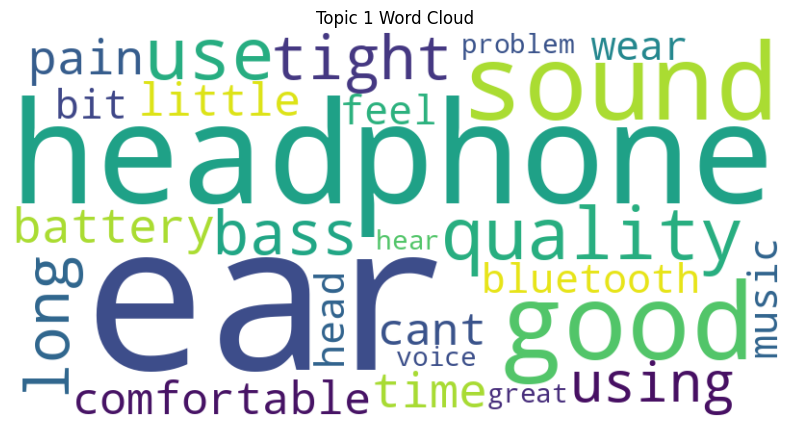

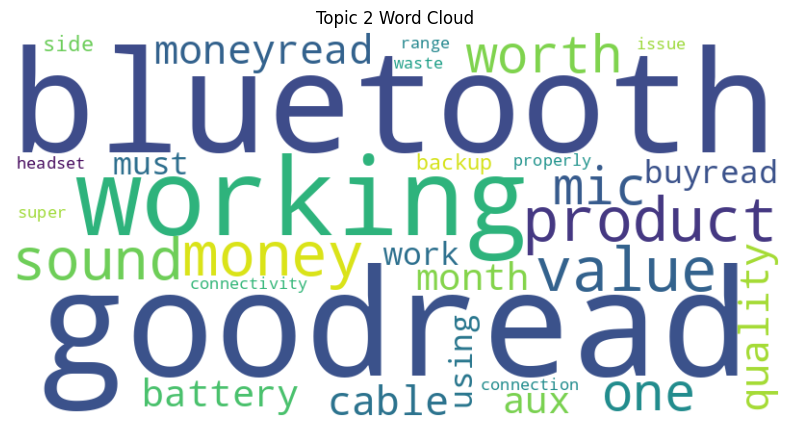

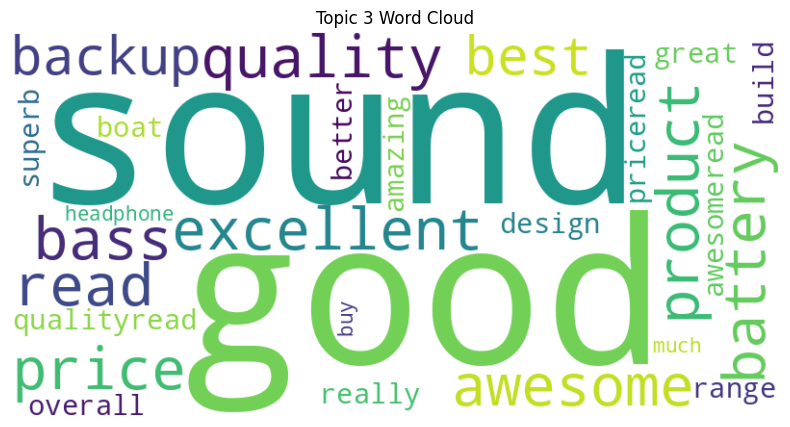

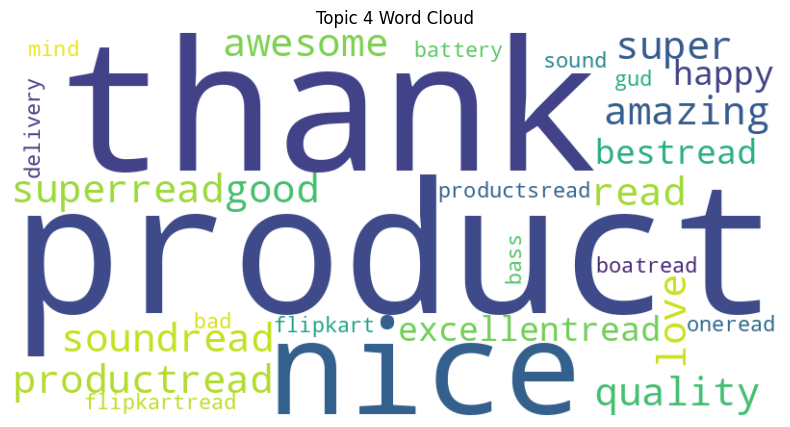

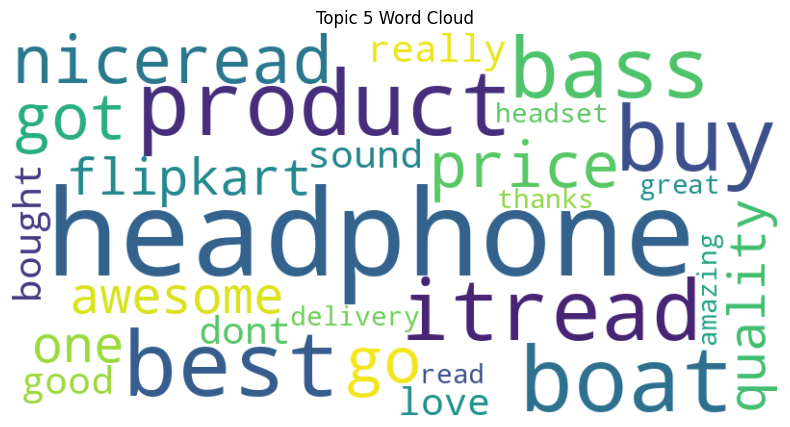

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate word cloud for a given topic
def generate_wordcloud(topic_words, topic_idx):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(topic_words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_idx + 1} Word Cloud')
    plt.axis('off')
    plt.show()

# Display word cloud for each topic
n_top_words = 30
for topic_idx, topic in enumerate(lda_model.components_):
    sorted_indices = topic.argsort()[::-1][:n_top_words]
    topic_words = [feature_names[i] for i in sorted_indices]
    generate_wordcloud(topic_words, topic_idx)
